# 6/49 Lottery Analysis 

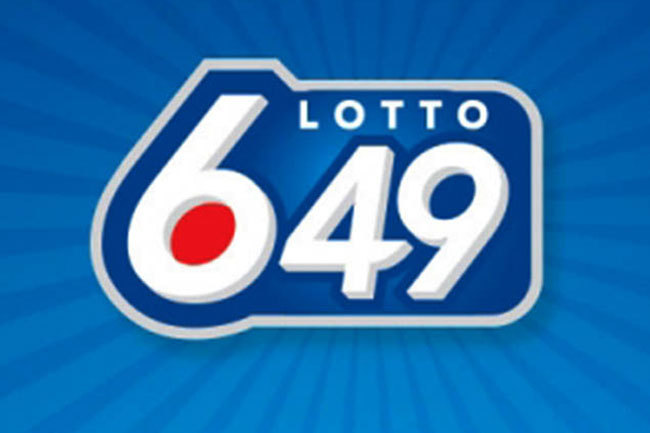

------

I'm personally not a big lottery player. However, as everyone else, I like the idea of winning the lottery and having such a lot of money in just a night (if you are the winner). Some people play lottery for fun, but soon it becomes a habit which eventually turns into an addiction. Besides that the lottery company's marketing team is doing such a great job creating a belief of everyone can be a millionaire [Lottery Winners](https://www.playnow.com/lottery/winners/you-could-be-next/). In Ontario province, we have OLG which is the Ontario government agency that delivers lottery and gaming entertainment. They provide variety lottery games; for instance, [LOTTO MAX](https://www.olg.ca/en/lottery/play-lotto-max-encore.html) that reaches `$70 million` on Tuesday, June 22, 2021 and [LOTTO 6/49](https://www.olg.ca/en/lottery/play-lotto-649-encore/about.html) that always guarantes `$1 million` in every draw night and maximum with `$5 millio`n on Wednesday, June 22, 2021. 

In this analysis, we just focus on the **6/49** lottery, create some functions and find the insights from the data set [649](https://www.kaggle.com/datascienceai/lottery-dataset) on Kaggle that has 3,665 drawings from 1982 to 2018.

Through the analysis, we want to find the answers for the following questions:
* What is the probability of winning the big prize with a single ticket?
* What is the probability of winning the big prize if we play 50 different tickets (or any different number)?
* What is the probability of having at least five (or four, or three, or two) winning numbers on a single ticket?

# 6/49 Gameplay

--------

As the name implies, six numbers are drawn from a set of 49. if a ticke matches all six numbers, the jackpot prize of at least `$5 million` is won. There is a bonus number is drawn and if a player's ticket matches five numbers plus the bonus number then the player wins the "second prize" which is usually between `$100,000 and $500,000`.

In case there are more than one player win the top or second prize, it will be split amongst them. Lesser prizes are also awarded if one matches at least two numbers. If the top prize is not won, the jackpot prize increases for the next draw.

# Creating Functions

--------

From the 6/49 gameplay, we know how the game works. For example, if a player bought a ticket with the numbers {07,02,19,91,11,56}, he/she only wins the big prize if the six numbers on the tickets match all the drawn six numbers as {07,02,19,91,11,56} (the order does not matter).

* We will create a function that can calculate the probability of winning the big prize with the various numbers they play on a single ticket.

* Then we can compare their ticket with the historical lottery data and consider whether they might win or not. Since the data set consists of 3,665 drawings dating from 1982 to 2018. For each drawing, we can find the six numbers drawn in the following 6 columns:

    - NUMBER DRAWN 1
    - NUMBER DRAWN 2
    - NUMBER DRAWN 3
    - NUMBER DRAWN 4
    - NUMBER DRAWN 5
    - NUMBER DRAWN 6

* We want to create another function to check the number of times the combination selected occured in the 6/49 data set as well as the probability of winning the big prize in the next drawing with that combination.

* Besides the big prize, we can also win the smaller prizes if the players' ticket match at least two, three, four, or five of the six numbers drawn. Therefore, the players might be interested in knowing the probability of having these two, three, four, or five winning numbers.

    * In the function, the user can input:
        * six different numbers from 1 to 49
        * an interger between 2 and 5 that represents the number of winning numbers expected.
    * The function will print information about the probabity of having the input number of winning numbers.
    * The function will not return the probability of having at least five winning numbers.

# Summary

In this analysis, we will be creating four functions that can help us to understand the odds of winning the 6/49 lottery from the past data:


|    <strong>Functions</strong>        |  Description                                        |
|-------------------|-----------------------------------------------------|
|<strong>big_prize_proba() </strong>  | Calculates the probability of winnig the big prize with a one ticket    |   
|<strong>check_past_winning()</strong>         | Checks whether a certain combination has occurred in 6/49 data set     |   
|<strong>check_multi_proba()</strong>         | Calculates the probability for any number of the ticket  |
|<strong>check_less_6_proba()</strong>   |  Calculates the probability of having two, three, four, or five winning numbers  |


#### Creates a factorial function

In [5]:
def factorial(n):
    final_product = 1
    for i in range(n, 0, -1):
        final_product *= i
    return final_product

In [9]:
# Checks the function
factorial(3)

6

#### Creates a combination function in order to find the total possible ticket numbers with all the combination of the expected numbers.

In [32]:
def combination(n,k):
    numerator = factorial(n)
    denominator = factorial(k) * factorial(n-k)
    return numerator / denominator


In [34]:
# Check the function

combination(49,6) # There are 49 possible numbers, and 6 numbers are sampled

13983816.0

So there is only one possible winning ticket out of `13,983,816` tickets.

### Checking the probability of winning a big prize.

We will calculates the probability for any number of tickets between **1** and **13,983,816**

We want the players can be able to calculate the probability of winning the big prize with the various numbers they play on a single ticket (for each ticket a player have to choose 6 numbers out of 49).

In [39]:
# Creates an explicit probability of one winning ticket

def big_prize_proba(numbers):
    total_outcomes = combination(49, 6) # There are 49 possible numbers, and 6 numbers are sampled
    successful_outcome = 1 / total_outcomes # There is only one winning number
    probability_winning = (successful_outcome / total_outcomes) *100
    print(f"You're chances of winning are {probability_winning} %!")

In [40]:
# Check the function

test_1 = [7,2,19,91,11,56]

big_prize_proba(test_1)

You're chances of winning are 5.113857220388566e-13 %!


In [42]:
test_2 = [34,22,19,4,51,95]

big_prize_proba(test_2)

You're chances of winning are 5.113857220388566e-13 %!


### Checking Historical Data

Let's explore the historical data from the 6/49 data set.

Since the data set has 3,665 drawings dating from 1982 to 2018, we can find the six numbers drawn in the following 6 columns:

    - NUMBER DRAWN 1
    - NUMBER DRAWN 2
    - NUMBER DRAWN 3
    - NUMBER DRAWN 4
    - NUMBER DRAWN 5
    - NUMBER DRAWN 6

In [ ]:
import pandas as pd

In [43]:
df.head()

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
0,649,1,0,6/12/1982,3,11,12,14,41,43,13
1,649,2,0,6/19/1982,8,33,36,37,39,41,9
2,649,3,0,6/26/1982,1,6,23,24,27,39,34
3,649,4,0,7/3/1982,3,9,10,13,20,43,34
4,649,5,0,7/10/1982,5,14,21,31,34,47,45


In [26]:
# extracts all the winning six numbers from the historical data
def extract_numbers(row):
    row = row[4:10]
    row = set(row.values)
    return row

# assigns the winning number
winning_numbers = df.apply(extract_numbers, axis = 1) # Pandas.apply allows the users to pass a function and apply it on every single value of the Pandas series              

winning_numbers

0        {3, 41, 11, 12, 43, 14}
1        {33, 36, 37, 39, 8, 41}
2         {1, 6, 39, 23, 24, 27}
3         {3, 9, 10, 43, 13, 20}
4        {34, 5, 14, 47, 21, 31}
                  ...           
3660    {38, 40, 41, 10, 15, 23}
3661    {36, 46, 47, 19, 25, 31}
3662     {32, 34, 6, 22, 24, 31}
3663     {2, 38, 15, 49, 21, 31}
3664    {35, 37, 14, 48, 24, 31}
Length: 3665, dtype: object

In [44]:
# creates a function to check the historical winning numbers

def check_past_winning(user_nums, historical_nums):
    '''
    user_nums: a list
    historical_nums: a Pandas series
    '''
    
    user_nums_set = set(user_nums)
    check_matching = historical_nums == user_nums_set
    nums_occurence = check_matching.sum() # count if there are any TRUE occurences in the set
    
    if nums_occurence == 0:
        print(f'The combination {user_nums} did not happen before.')
        
    else:
        print(f'The number of times the combination {user_nums} appeared in the past is {nums_occurence}')


In [49]:
# Check the function
check_past_winning(test_1, winning_numbers)


The combination [7, 2, 19, 91, 11, 56] did not happen before.


In [50]:
# a new set of 6 numbers
test_3 = [56,41,24,2,1,5]

check_past_winning(test_3, winning_numbers)

The combination [56, 41, 24, 2, 1, 5] did not happen before.


### Checking the probability of winning for multiple tickets

In a scenario when the user wants to buy multiple tickets to increase the chance of winning. Therefore, we want to create a function to replicate the probability of winning the big prize depending on the number of different tickets played.


In [76]:
def check_multi_proba(n_tickets_played):
    total_outcomes = combination(49, 6) # There are 49 possible numbers, and 6 numbers are sampled
    successful_outcome = 1 / total_outcomes # There is only one winning number
    probability_n_tickets = (successful_outcome / total_outcomes) * 100
    
    if n_tickets_played == 1:
        print('''Your chances to win the big prize with one ticket are {:.20f}%. 
In other words, you have 1 in {:,} chances to win.'''.format(probability_n_tickets, int(total_outcomes)))
        
    else:
        combination_simplified = round(total_outcomes / n_tickets_played)
        print('''Your chances to win the big prize with {:,} different tickets are {:.20f}%.
In other words, you have a 1 in {:,} chances to win.'''.format(n_tickets_played, probability_n_tickets, combination_simplified))

In [77]:
# Check the function with 6 tickets

check_multi_proba(6)

Your chances to win the big prize with 6 different tickets are 0.00000000000051138572%.
In other words, you have a 1 in 2,330,636 chances to win.


It looks like the chance to win the big prize with 6 tickets is too small.

Let's check with multiple different numbers of ticket:

In [78]:
multi_tickets = [1, 10, 100, 1000, 2000, 13983816]

for n in multi_tickets:
    check_multi_proba(n)
    print("=====================================================================")

Your chances to win the big prize with one ticket are 0.00000000000051138572%. 
In other words, you have 1 in 13,983,816 chances to win.
Your chances to win the big prize with 10 different tickets are 0.00000000000051138572%.
In other words, you have a 1 in 1,398,382 chances to win.
Your chances to win the big prize with 100 different tickets are 0.00000000000051138572%.
In other words, you have a 1 in 139,838 chances to win.
Your chances to win the big prize with 1,000 different tickets are 0.00000000000051138572%.
In other words, you have a 1 in 13,984 chances to win.
Your chances to win the big prize with 2,000 different tickets are 0.00000000000051138572%.
In other words, you have a 1 in 6,992 chances to win.
Your chances to win the big prize with 13,983,816 different tickets are 0.00000000000051138572%.
In other words, you have a 1 in 1 chances to win.


We can obviously see that we all share one successfull outcome which is 0.00000000000051138572% to win. However, if we buy more tickets we can statistically narrow down the probablity to win the big prize.

### Checking the probability for smaller prizes

Since the probability to win the big prize is extremely small and rare, we can expect to win the smaller prizes if the user's ticket match at least two, three, four, or five drawn numbers. Therefore, the user could be interested in knowing the probability of having some of the winning numbers in the ticket.

The function we are going to create should have some inputs below:
* 6 different numbers from 1 to 49
* an integer between 2 and 5 that showcase the winning numbers as expected.

The function should print the information about the probability of having the inputted number of winning numbers.

The function below will facilitate us to calculate the probability that an user's ticket could match exactly the given winning numbers. If the user wants to find out the probability of having 5 winning numbers, the function will return the probability of having exactly 5 winning numbers (and nothing other than that). The function will not retunr the probablity of having at least 5 winning numbers.


In [83]:
def check_less_6_proba(n_winning_numbers):
    # assign the total possible tickets with the inputted winning numbers
    n_combination_ticket = combination(6, n_winning_numbers)
    # assign the total possible remaining tickets without the inputted winning numbers
    n_combination_remaining = combination(43, 6 - n_winning_numbers)
    # assign the possible successful outcome of with and without the inputted winning numbers
    successful_outcome = n_combination_ticket * n_combination_remaining
    
    total_outcomes = combination(49, 6) #There are 49 possible numbers, and six numbers are sampled without replacement.
    
    # assign the probability of the successful outcome over the total outcomes.
    probability = successful_outcome / total_outcomes
    probability_n_tickets = probability *100
    
    # assign the numbers of chance to win
    combinations_simplified = round(total_outcomes / successful_outcome) 
    
    print('''
    Your chances to win the big prize with {:,} different tickets are {:.6f}%.
    In other words, you have a 1 in {:,} chances to win'''.format(n_winning_numbers, probability_n_tickets, combinations_simplified))

In [85]:
# Check the function

winning_list = [2,3,4,5] # at least 2,3,4,or 5 winning numbers

for num in winning_list:
    check_less_6_proba(num)
    print("=========================================================================")


    Your chances to win the big prize with 2 different tickets are 13.237803%.
    In other words, you have a 1 in 8 chances to win

    Your chances to win the big prize with 3 different tickets are 1.765040%.
    In other words, you have a 1 in 57 chances to win

    Your chances to win the big prize with 4 different tickets are 0.096862%.
    In other words, you have a 1 in 1,032 chances to win

    Your chances to win the big prize with 5 different tickets are 0.001845%.
    In other words, you have a 1 in 54,201 chances to win


## Conclusion.

We had created 4 functions:

* **big_prize_proba()**
    
* **check_past_winning()**
    
* **check_multi_proba()**
    
* **check_less_6_proba()**
    
With all the probability information of winning the prize above, we have more insights reinforcing the fact that the chance to win a prize is really rare and it will be challenging in order to come up with the winning numbers. It requires more than luck in order to win the prize and people should not put all the time and resource in order to win the lottery if they don't want to loose their time and money.

### END